<a href="https://colab.research.google.com/github/Ha-minss/Classes-in-University/blob/main/DT%20-%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [38]:
cali=datasets.fetch_california_housing()
df = pd.DataFrame(cali.data, columns = cali.feature_names)
df["price"] = cali.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
np.unique(df["price"])

array([0.14999, 0.175  , 0.225  , ..., 4.991  , 5.     , 5.00001])

In [40]:
input=cali.data
output=df["price"]

In [41]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input,output)

In [42]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()

In [43]:
DTR.fit(train_input,train_output)

DecisionTreeRegressor()

In [44]:
DTR.score(test_input,test_output)

0.625021892759878

In [45]:
np.corrcoef(DTR.predict(test_input), test_output)

array([[1.        , 0.81151414],
       [0.81151414, 1.        ]])

In [46]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(DTR.predict(test_input),test_output)
print(mse)

0.5103568168840696


In [47]:
nmse = mse/np.max(test_output)
print(nmse)

0.10207115923449547


[Text(0.5, 0.875, 'MedInc <= 5.085\nsquared_error = 1.322\nsamples = 15480\nvalue = 2.072'),
 Text(0.25, 0.625, 'MedInc <= 3.074\nsquared_error = 0.841\nsamples = 12320\nvalue = 1.749'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'AveRooms <= 4.216\nsquared_error = 0.559\nsamples = 5900\nvalue = 1.363'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'AveOccup <= 2.373\nsquared_error = 0.836\nsamples = 6420\nvalue = 2.104'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'MedInc <= 6.82\nsquared_error = 1.214\nsamples = 3160\nvalue = 3.328'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AveOccup <= 2.599\nsquared_error = 0.888\nsamples = 2158\nvalue = 2.923'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'MedInc <= 7.836\nsquared_error = 0.8\nsamples = 1002\nvalue = 4.201'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0

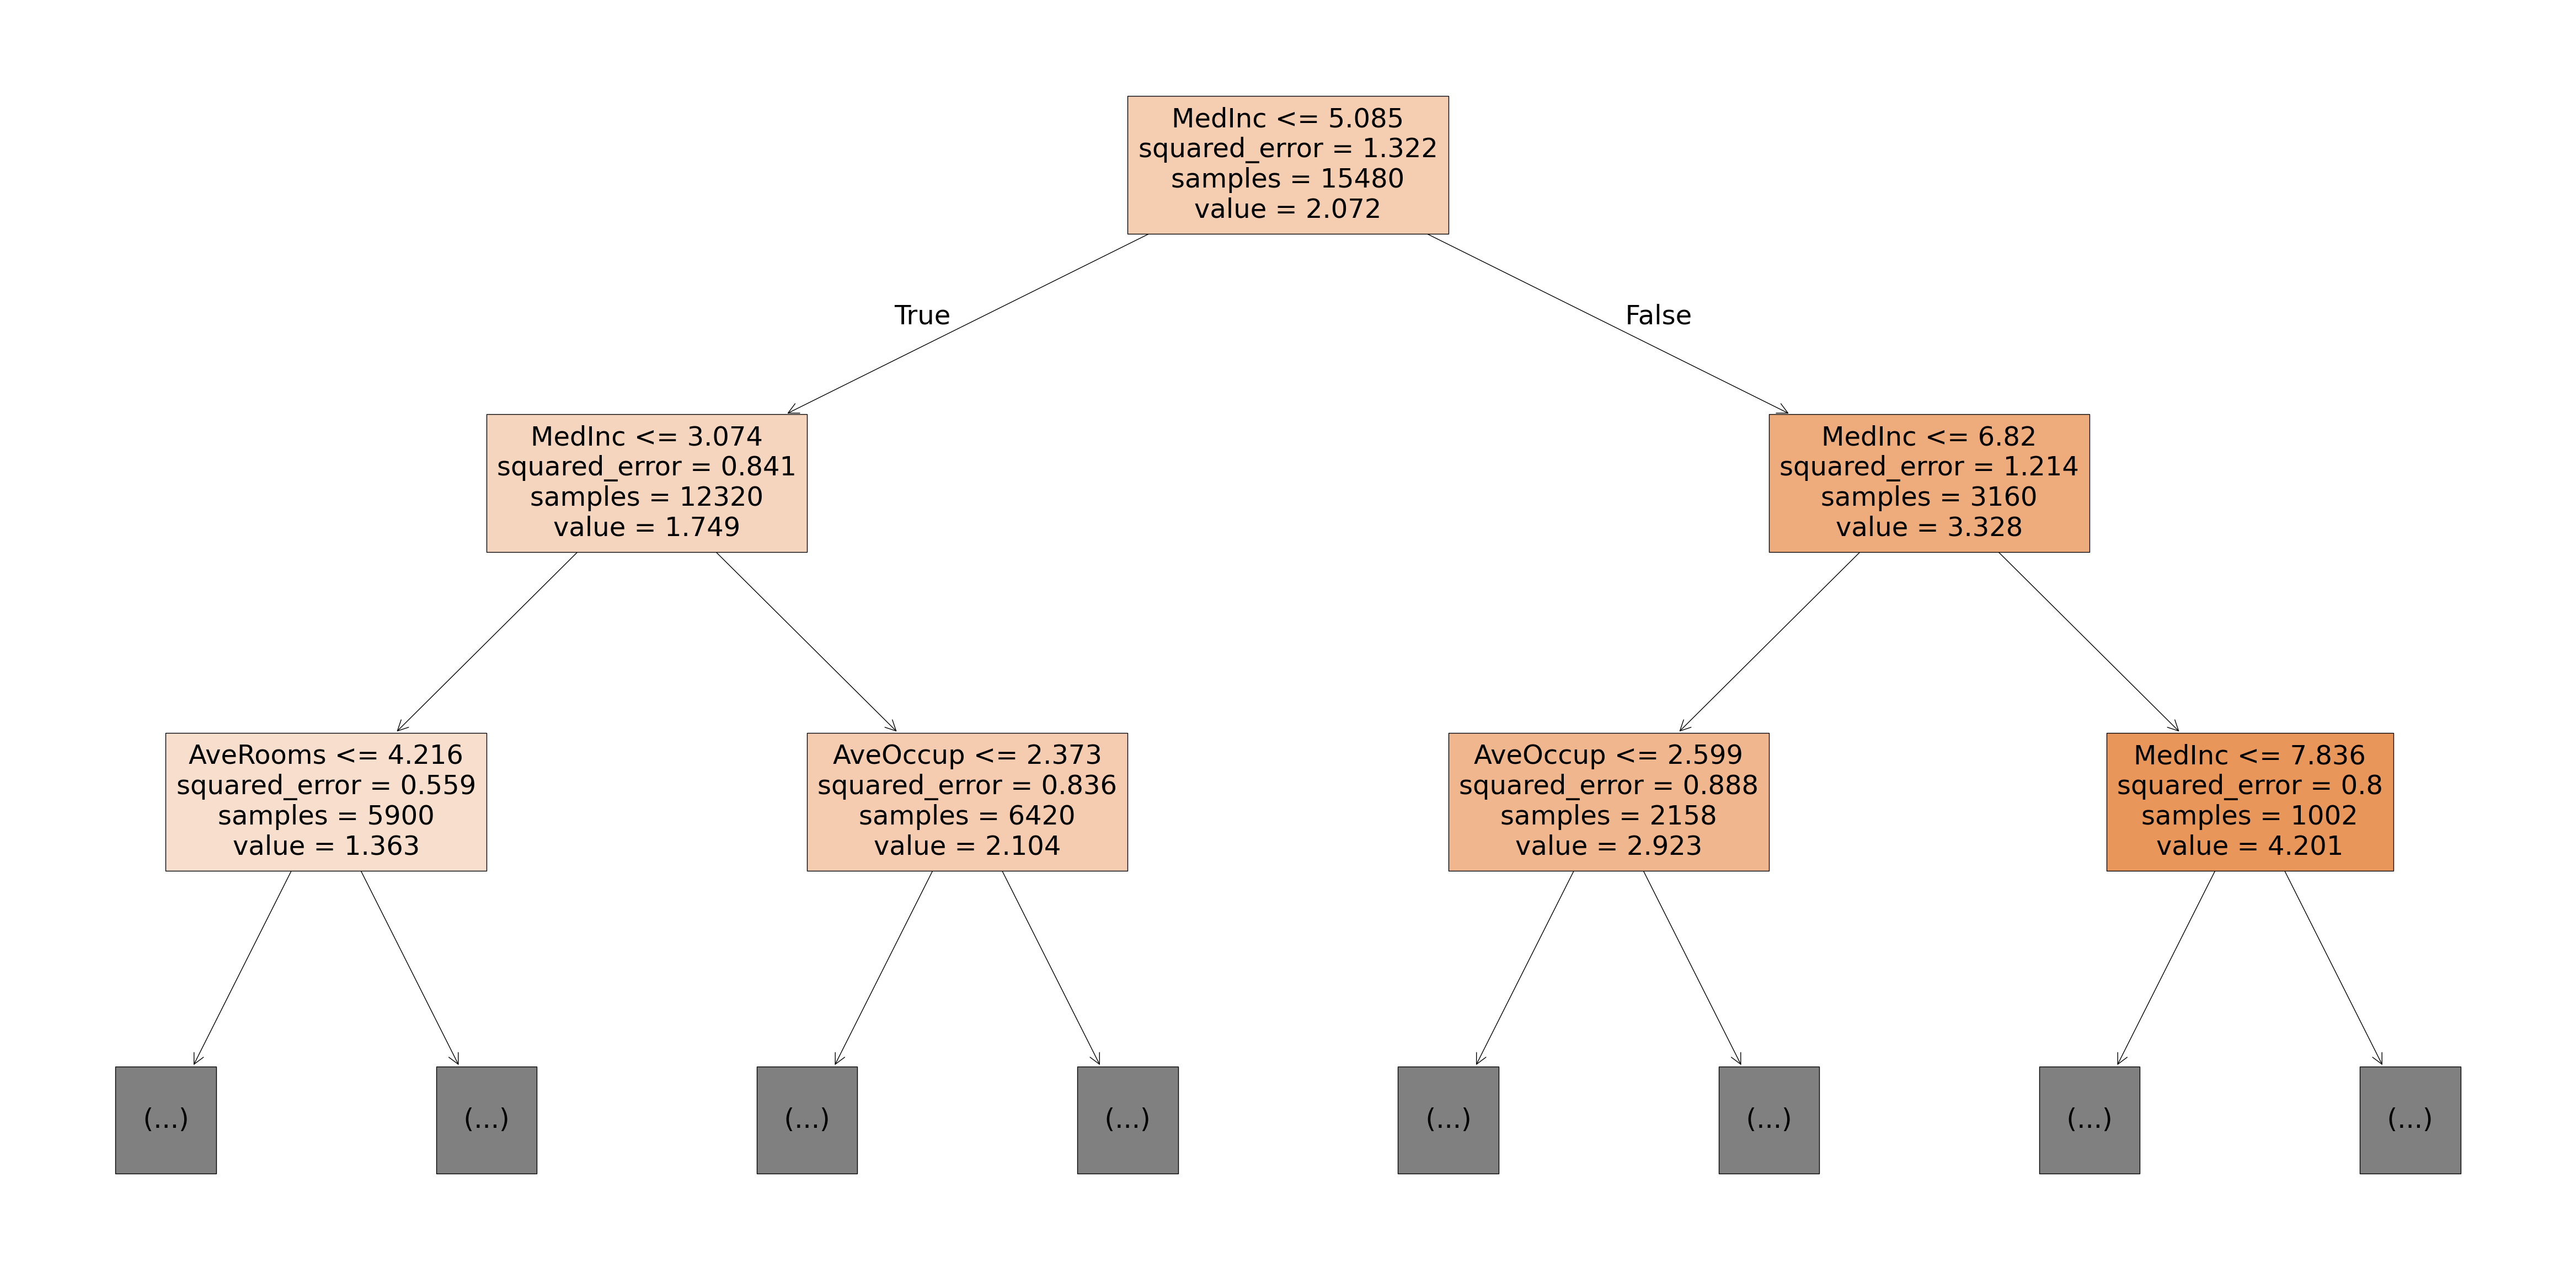

In [48]:
plt.figure(figsize=(60,30))
plot_tree(DTR, max_depth= 2, filled = True, feature_names= cali.feature_names)